In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options for better visibility
pd.set_option('display.max_columns', None)

# Load the datasets
try:
    customers_df = pd.read_csv('Customers.csv')
    products_df = pd.read_csv('Products.csv')
    transactions_df = pd.read_csv('Transactions.csv')
    
    print("Datasets loaded successfully!")
    
    print("\nCUSTOMERS DATA SHAPE:", customers_df.shape)
    print("PRODUCTS DATA SHAPE:", products_df.shape)
    print("TRANSACTIONS DATA SHAPE:", transactions_df.shape)
    
    print("\nFirst few rows of Customers data:")
    print(customers_df.head())
    
except FileNotFoundError:
    print("Error: One or more CSV files not found!")
    print("Please make sure your CSV files are in the same directory as your Jupyter notebook")
    print("Required files: Customers.csv, Products.csv, Transactions.csv")

Datasets loaded successfully!

CUSTOMERS DATA SHAPE: (200, 4)
PRODUCTS DATA SHAPE: (100, 4)
TRANSACTIONS DATA SHAPE: (1000, 7)

First few rows of Customers data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


BASIC DATA EXPLORATION

1. CUSTOMERS DATASET:
Number of unique customers: 200

Customer distribution by Region:
South America    59
Europe           50
North America    46
Asia             45
Name: Region, dtype: int64

2. PRODUCTS DATASET:
Number of unique products: 100

Product distribution by Category:
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: Category, dtype: int64

3. TRANSACTIONS DATASET:
Total number of transactions: 1000

Basic transaction statistics:
          Quantity   TotalValue
count  1000.000000  1000.000000
mean      2.537000   689.995560
std       1.117981   493.144478
min       1.000000    16.080000
25%       2.000000   295.295000
50%       3.000000   588.880000
75%       4.000000  1011.660000
max       4.000000  1991.040000


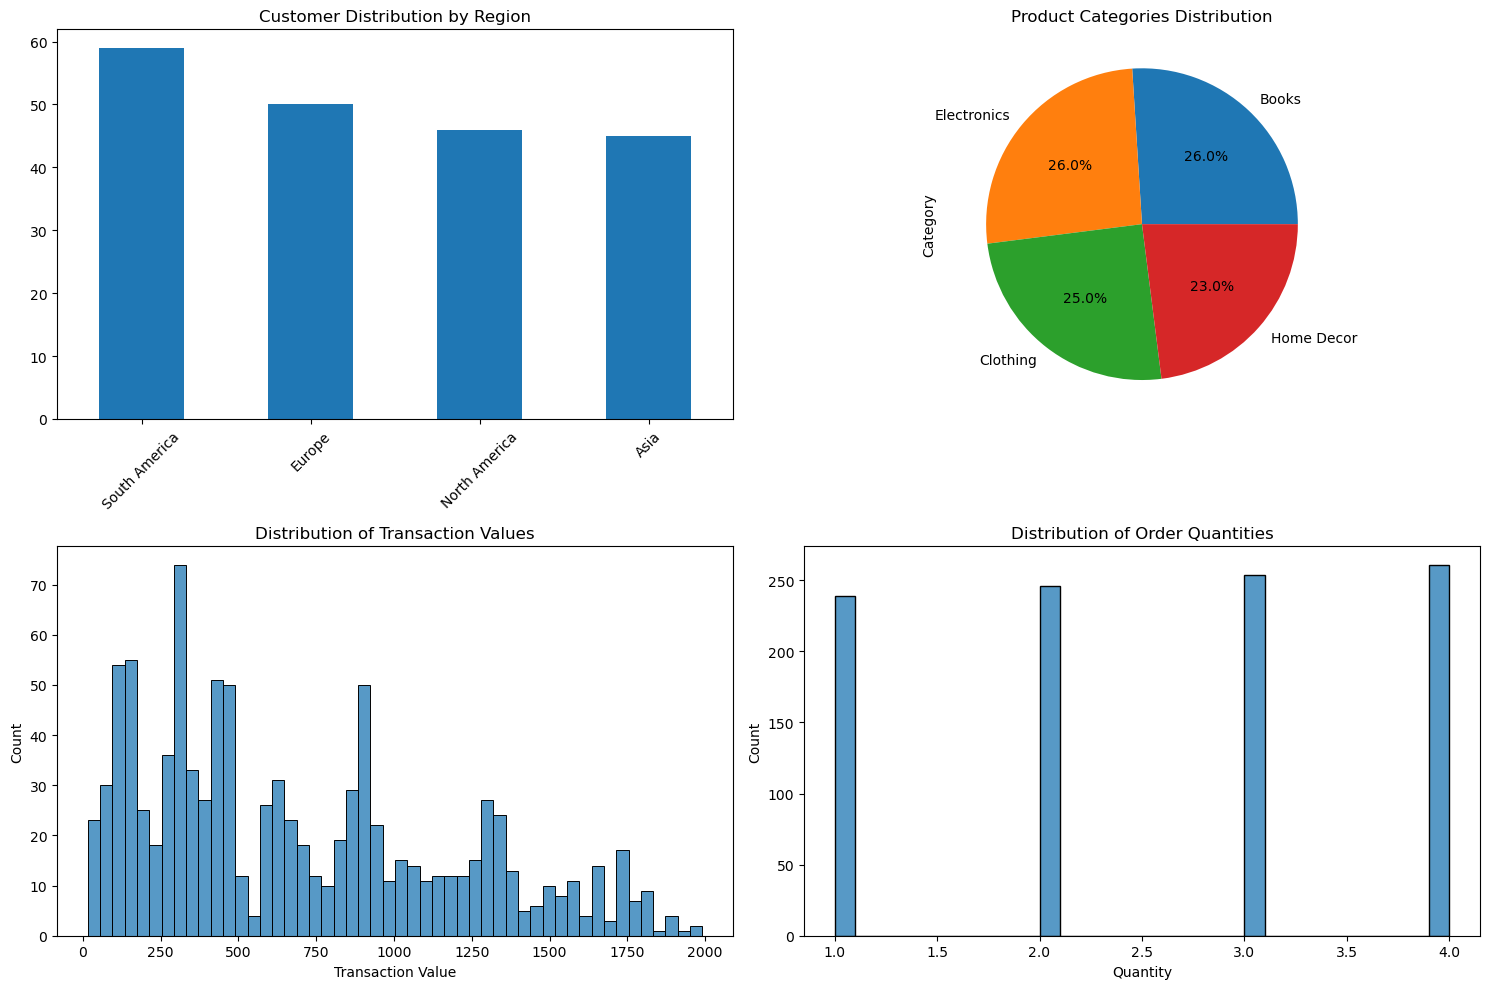

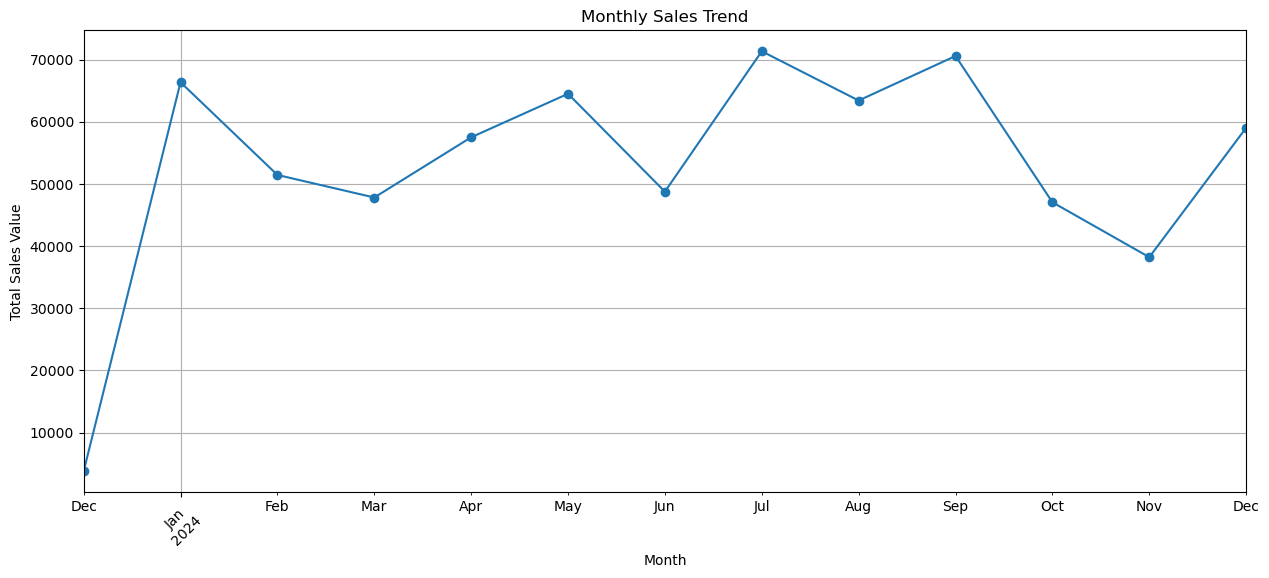


Top 10 Customers by Purchase Value:
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64

Top 10 Products by Quantity Sold:
ProductID
P059    46
P054    46
P029    45
P079    43
P061    43
P057    43
P048    43
P062    39
P020    38
P028    38
Name: Quantity, dtype: int64


In [4]:
# 1. Basic Data Exploration
print("BASIC DATA EXPLORATION")
print("\n1. CUSTOMERS DATASET:")
print("Number of unique customers:", len(customers_df))
print("\nCustomer distribution by Region:")
print(customers_df['Region'].value_counts())

print("\n2. PRODUCTS DATASET:")
print("Number of unique products:", len(products_df))
print("\nProduct distribution by Category:")
print(products_df['Category'].value_counts())

print("\n3. TRANSACTIONS DATASET:")
print("Total number of transactions:", len(transactions_df))
print("\nBasic transaction statistics:")
print(transactions_df[['Quantity', 'TotalValue']].describe())

# 2. Data Visualization
plt.figure(figsize=(15, 10))

# Plot 1: Customer Distribution by Region
plt.subplot(2, 2, 1)
customers_df['Region'].value_counts().plot(kind='bar')
plt.title('Customer Distribution by Region')
plt.xticks(rotation=45)

# Plot 2: Product Categories
plt.subplot(2, 2, 2)
products_df['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Product Categories Distribution')

# Plot 3: Transaction Values Distribution
plt.subplot(2, 2, 3)
sns.histplot(transactions_df['TotalValue'], bins=50)
plt.title('Distribution of Transaction Values')
plt.xlabel('Transaction Value')

# Plot 4: Quantity Distribution
plt.subplot(2, 2, 4)
sns.histplot(transactions_df['Quantity'], bins=30)
plt.title('Distribution of Order Quantities')
plt.xlabel('Quantity')

plt.tight_layout()
plt.show()

# 3. Time-based Analysis
# Convert TransactionDate to datetime
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# Monthly sales analysis
monthly_sales = transactions_df.groupby(transactions_df['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()

plt.figure(figsize=(15, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 4. Top Customers and Products
# Top 10 customers by total purchase value
top_customers = transactions_df.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Customers by Purchase Value:")
print(top_customers)

# Top 10 products by quantity sold
top_products = transactions_df.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Products by Quantity Sold:")
print(top_products)

CUSTOMERS DATASET ANALYSIS
--------------------------------------------------

First 5 rows of Customers data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Customer Distribution by Region:
South America    59
Europe           50
North America    46
Asia     

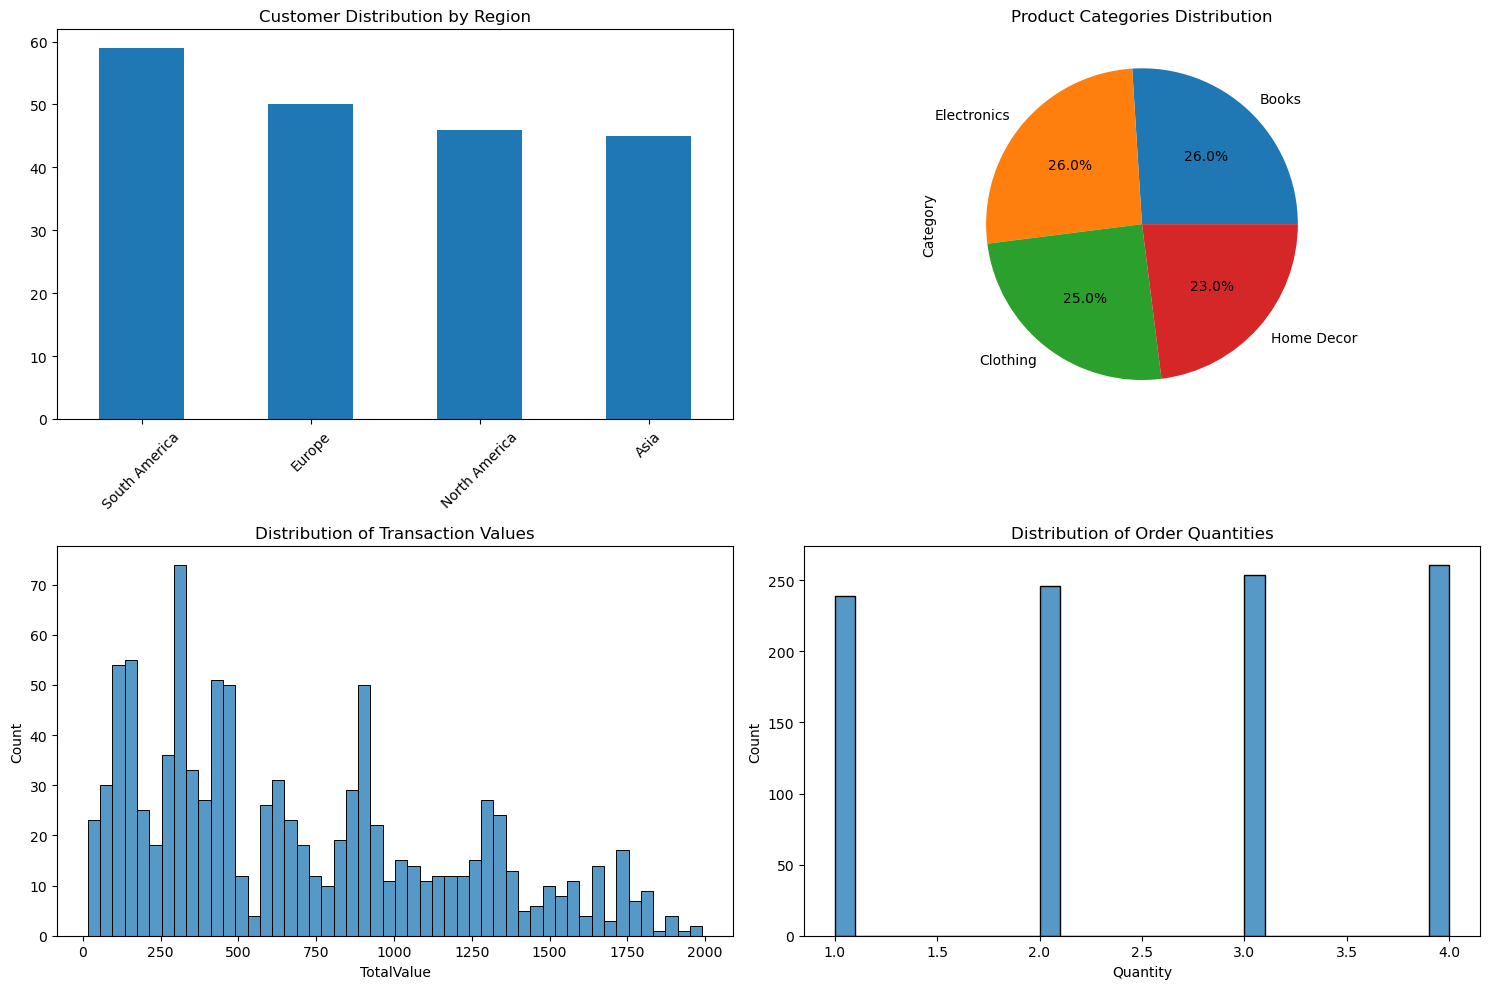

In [5]:
# 2. BASIC DATA EXPLORATION

# 2.1 Customers Dataset Analysis
print("CUSTOMERS DATASET ANALYSIS")
print("-" * 50)
print("\nFirst 5 rows of Customers data:")
print(customers_df.head())
print("\nCustomers Dataset Info:")
print(customers_df.info())
print("\nCustomer Distribution by Region:")
print(customers_df['Region'].value_counts())

# 2.2 Products Dataset Analysis
print("\n\nPRODUCTS DATASET ANALYSIS")
print("-" * 50)
print("\nFirst 5 rows of Products data:")
print(products_df.head())
print("\nProducts Dataset Info:")
print(products_df.info())
print("\nProduct Distribution by Category:")
print(products_df['Category'].value_counts())
print("\nPrice Statistics:")
print(products_df['Price'].describe())

# 2.3 Transactions Dataset Analysis
print("\n\nTRANSACTIONS DATASET ANALYSIS")
print("-" * 50)
print("\nFirst 5 rows of Transactions data:")
print(transactions_df.head())
print("\nTransactions Dataset Info:")
print(transactions_df.info())
print("\nTransaction Statistics:")
print(transactions_df[['Quantity', 'TotalValue']].describe())

# 2.4 Basic Visualizations
plt.figure(figsize=(15, 10))

# Customer Region Distribution
plt.subplot(2, 2, 1)
customers_df['Region'].value_counts().plot(kind='bar')
plt.title('Customer Distribution by Region')
plt.xticks(rotation=45)

# Product Category Distribution
plt.subplot(2, 2, 2)
products_df['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Product Categories Distribution')

# Transaction Value Distribution
plt.subplot(2, 2, 3)
sns.histplot(transactions_df['TotalValue'], bins=50)
plt.title('Distribution of Transaction Values')

# Quantity Distribution
plt.subplot(2, 2, 4)
sns.histplot(transactions_df['Quantity'], bins=30)
plt.title('Distribution of Order Quantities')

plt.tight_layout()
plt.show()

CUSTOMER SIGNUP ANALYSIS
--------------------------------------------------

Signup Statistics by Year:
2022    64
2023    57
2024    79
Name: SignupDate, dtype: int64

CUSTOMER PURCHASE BEHAVIOR
--------------------------------------------------

Overall Customer Statistics:
       Number_of_Transactions   Total_Spent  Avg_Transaction_Value  \
count              199.000000    199.000000             199.000000   
mean                 5.025126   3467.314372             687.580101   
std                  2.198340   1832.677958             237.936708   
min                  1.000000     82.360000              82.360000   
25%                  3.000000   2162.040000             542.940000   
50%                  5.000000   3137.660000             677.210000   
75%                  6.000000   4770.225000             828.625000   
max                 11.000000  10673.870000            1323.130000   

       Total_Items_Bought  
count          199.000000  
mean            12.748744  
std     

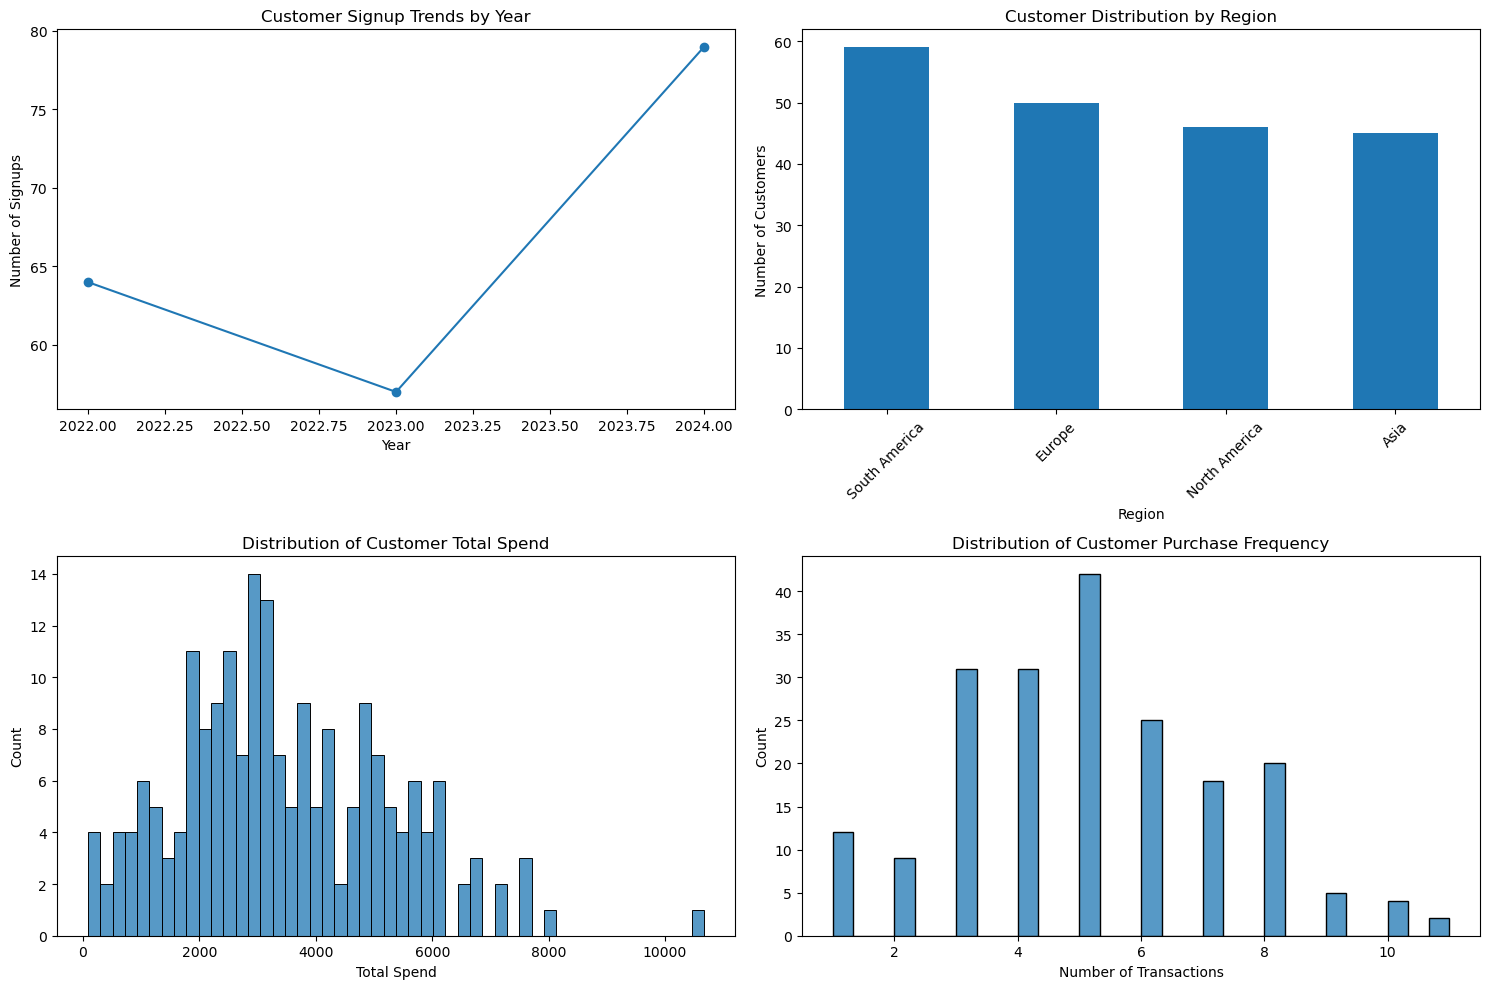


TOP 10 CUSTOMERS BY TOTAL SPEND
--------------------------------------------------
            Number_of_Transactions  Total_Spent  Avg_Transaction_Value  \
CustomerID                                                               
C0141                           10     10673.87                1067.39   
C0054                            8      8040.39                1005.05   
C0065                           10      7663.70                 766.37   
C0156                           11      7634.45                 694.04   
C0082                            7      7572.91                1081.84   
C0188                            8      7111.32                 888.92   
C0059                            8      7073.28                 884.16   
C0028                            8      6819.57                 852.45   
C0099                            8      6715.72                 839.46   
C0165                            9      6708.10                 745.34   

            Total_Items_Bou

In [6]:
# 3. CUSTOMER ANALYSIS

# Convert dates to datetime format
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# 3.1 Customer Signup Analysis
print("CUSTOMER SIGNUP ANALYSIS")
print("-" * 50)
print("\nSignup Statistics by Year:")
yearly_signups = customers_df['SignupDate'].dt.year.value_counts().sort_index()
print(yearly_signups)

# 3.2 Customer Purchase Behavior
customer_purchase_analysis = transactions_df.groupby('CustomerID').agg({
    'TransactionID': 'count',
    'TotalValue': ['sum', 'mean'],
    'Quantity': 'sum'
}).round(2)

customer_purchase_analysis.columns = ['Number_of_Transactions', 'Total_Spent', 'Avg_Transaction_Value', 'Total_Items_Bought']
print("\nCUSTOMER PURCHASE BEHAVIOR")
print("-" * 50)
print("\nOverall Customer Statistics:")
print(customer_purchase_analysis.describe())

# 3.3 Visualizations
plt.figure(figsize=(15, 10))

# Plot 1: Customer Signup Trends
plt.subplot(2, 2, 1)
yearly_signups.plot(kind='line', marker='o')
plt.title('Customer Signup Trends by Year')
plt.xlabel('Year')
plt.ylabel('Number of Signups')

# Plot 2: Customer Distribution by Region
plt.subplot(2, 2, 2)
customers_df['Region'].value_counts().plot(kind='bar')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)

# Plot 3: Distribution of Customer Total Spend
plt.subplot(2, 2, 3)
sns.histplot(customer_purchase_analysis['Total_Spent'], bins=50)
plt.title('Distribution of Customer Total Spend')
plt.xlabel('Total Spend')

# Plot 4: Distribution of Customer Purchase Frequency
plt.subplot(2, 2, 4)
sns.histplot(customer_purchase_analysis['Number_of_Transactions'], bins=30)
plt.title('Distribution of Customer Purchase Frequency')
plt.xlabel('Number of Transactions')

plt.tight_layout()
plt.show()

# 3.4 Top Customers Analysis
print("\nTOP 10 CUSTOMERS BY TOTAL SPEND")
print("-" * 50)
top_customers = customer_purchase_analysis.sort_values('Total_Spent', ascending=False).head(10)
print(top_customers)

# 3.5 Customer Segmentation by Purchase Frequency
def categorize_frequency(x):
    if x <= 2: return 'Low'
    elif x <= 5: return 'Medium'
    else: return 'High'

customer_purchase_analysis['Frequency_Category'] = customer_purchase_analysis['Number_of_Transactions'].apply(categorize_frequency)
print("\nCUSTOMER SEGMENTATION BY PURCHASE FREQUENCY")
print("-" * 50)
print(customer_purchase_analysis['Frequency_Category'].value_counts())

PRODUCT ANALYSIS
--------------------------------------------------

Product Category Distribution:
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: Category, dtype: int64

Price Statistics by Category:
               mean    min     max  count
Category                                 
Books        292.21  33.59  497.76     26
Clothing     263.72  18.82  481.78     25
Electronics  275.35  16.08  459.86     26
Home Decor   235.02  41.18  454.53     23


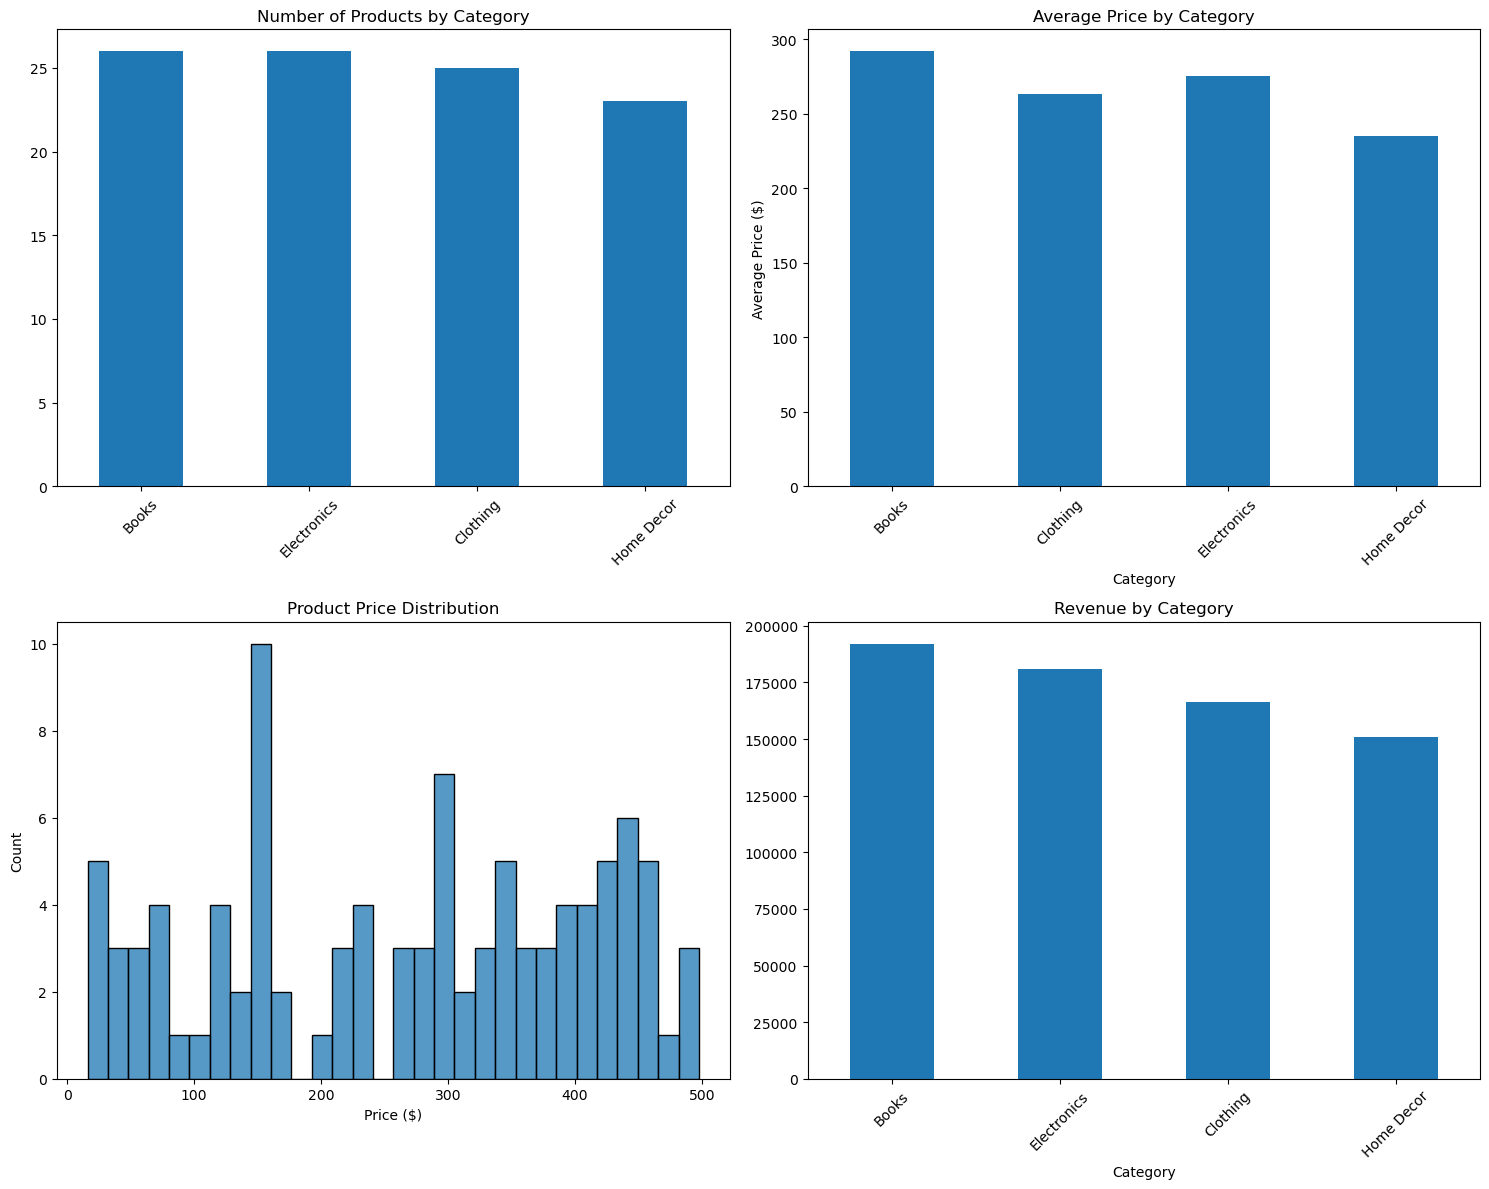


TOP 10 PRODUCTS BY REVENUE
--------------------------------------------------
                       Product_Name     Category  Total_Revenue  \
ProductID                                                         
P029             TechPro Headphones  Electronics       19513.80   
P079                 ActiveWear Rug   Home Decor       17946.91   
P048               TechPro Cookbook        Books       17905.20   
P020              ActiveWear Jacket     Clothing       15060.92   
P062                HomeSense Novel        Books       14592.24   
P059                SoundWave Jeans     Clothing       13947.20   
P039             TechPro Smartwatch  Electronics       13778.88   
P083          ActiveWear Smartwatch  Electronics       13671.60   
P019          ComfortLiving Sweater     Clothing       13487.95   
P041       ComfortLiving Smartphone  Electronics       13232.12   

           Total_Units_Sold  
ProductID                    
P029                     45  
P079                     4

In [7]:
# 4. PRODUCT ANALYSIS

# 4.1 Basic Product Statistics
print("PRODUCT ANALYSIS")
print("-" * 50)
print("\nProduct Category Distribution:")
category_distribution = products_df['Category'].value_counts()
print(category_distribution)

print("\nPrice Statistics by Category:")
category_price_stats = products_df.groupby('Category')['Price'].agg(['mean', 'min', 'max', 'count']).round(2)
print(category_price_stats)

# 4.2 Product Performance Analysis
product_performance = transactions_df.merge(products_df, on='ProductID').groupby('ProductID').agg({
    'Quantity': 'sum',
    'TotalValue': 'sum',
    'TransactionID': 'count',
    'ProductName': 'first',
    'Category': 'first'
}).round(2)

product_performance.columns = ['Total_Units_Sold', 'Total_Revenue', 'Number_of_Transactions', 'Product_Name', 'Category']

# 4.3 Visualizations
plt.figure(figsize=(15, 12))

# Plot 1: Category Distribution
plt.subplot(2, 2, 1)
category_distribution.plot(kind='bar')
plt.title('Number of Products by Category')
plt.xticks(rotation=45)

# Plot 2: Average Price by Category
plt.subplot(2, 2, 2)
category_price_stats['mean'].plot(kind='bar')
plt.title('Average Price by Category')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)

# Plot 3: Product Price Distribution
plt.subplot(2, 2, 3)
sns.histplot(products_df['Price'], bins=30)
plt.title('Product Price Distribution')
plt.xlabel('Price ($)')

# Plot 4: Top Categories by Revenue
plt.subplot(2, 2, 4)
product_performance.groupby('Category')['Total_Revenue'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Revenue by Category')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 4.4 Top Products Analysis
print("\nTOP 10 PRODUCTS BY REVENUE")
print("-" * 50)
top_products_revenue = product_performance.sort_values('Total_Revenue', ascending=False).head(10)
print(top_products_revenue[['Product_Name', 'Category', 'Total_Revenue', 'Total_Units_Sold']])

print("\nTOP 10 PRODUCTS BY UNITS SOLD")
print("-" * 50)
top_products_units = product_performance.sort_values('Total_Units_Sold', ascending=False).head(10)
print(top_products_units[['Product_Name', 'Category', 'Total_Units_Sold', 'Total_Revenue']])

# 4.5 Category Performance Metrics
category_metrics = product_performance.groupby('Category').agg({
    'Total_Revenue': 'sum',
    'Total_Units_Sold': 'sum',
    'Number_of_Transactions': 'sum'
}).round(2)

category_metrics['Average_Transaction_Value'] = (category_metrics['Total_Revenue'] / 
                                               category_metrics['Number_of_Transactions']).round(2)

print("\nCATEGORY PERFORMANCE METRICS")
print("-" * 50)
print(category_metrics.sort_values('Total_Revenue', ascending=False))

TRANSACTION TIME ANALYSIS
--------------------------------------------------

Monthly Trends Summary:
       Number_of_Transactions  Total_Revenue  Total_Items_Sold
count               13.000000      13.000000         13.000000
mean                76.923077   53076.581538        195.153846
std                 25.698449   17909.728454         64.512074
min                  4.000000    3769.520000         12.000000
25%                 70.000000   47828.730000        186.000000
50%                 80.000000   57519.060000        206.000000
75%                 94.000000   64527.740000        227.000000
max                107.000000   71366.390000        267.000000

TRANSACTION VALUE ANALYSIS
--------------------------------------------------
        TotalValue  Quantity
mean        690.00      2.54
median      588.88      3.00
min          16.08      1.00
max        1991.04      4.00
std         493.14      1.12


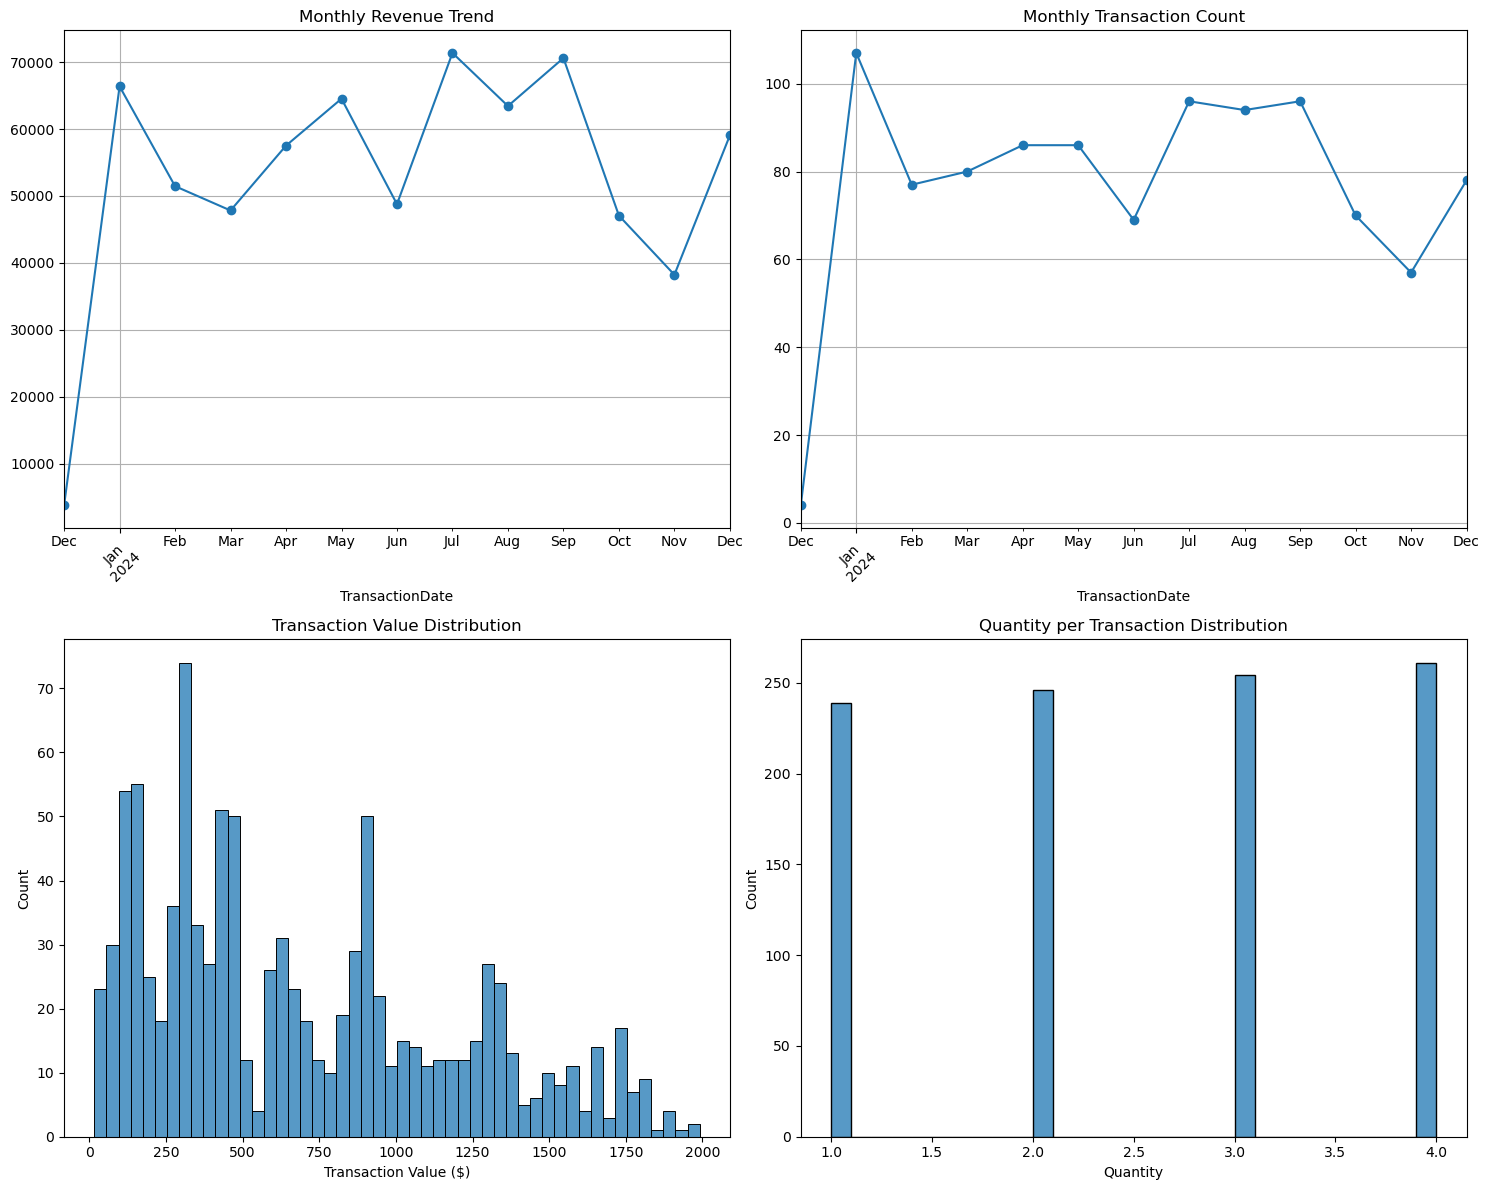


TRANSACTIONS BY DAY OF WEEK
--------------------------------------------------
           TransactionID  TotalValue  Quantity
DayOfWeek                                     
Monday               139   101984.33  2.517986
Tuesday              163   108567.61  2.558282
Wednesday            158   119203.15  2.563291
Thursday             150    99202.71  2.340000
Friday               125    87032.09  2.744000
Saturday             126    81399.74  2.460317
Sunday               139    92605.93  2.597122

TRANSACTION SIZE DISTRIBUTION
--------------------------------------------------
Large     818
Medium    163
Small      19
Name: Transaction_Size, dtype: int64


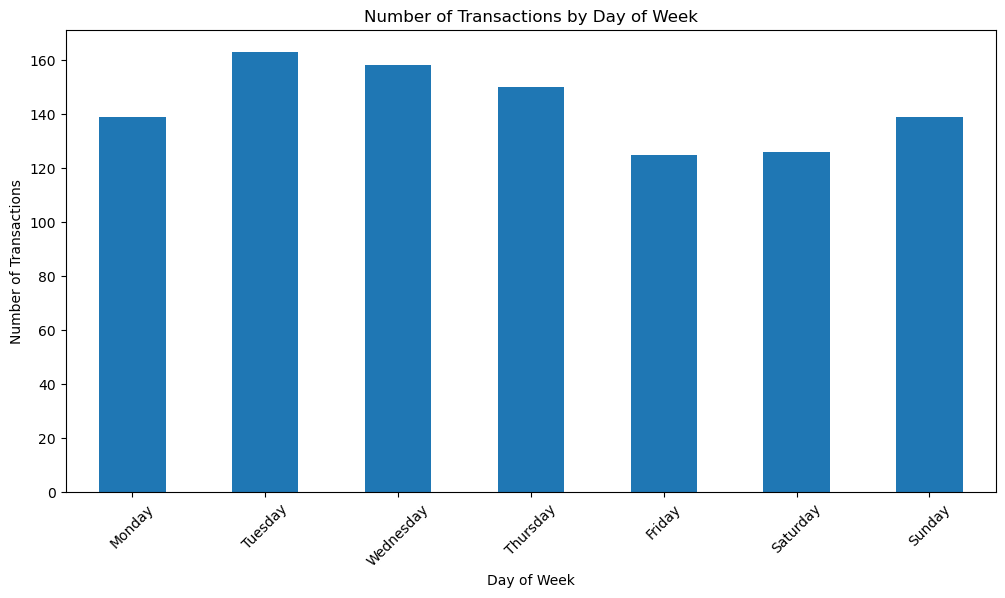

In [8]:
# 5. TRANSACTION ANALYSIS

# 5.1 Time-based Analysis
print("TRANSACTION TIME ANALYSIS")
print("-" * 50)

# Convert TransactionDate to datetime if not already
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# Monthly analysis
monthly_analysis = transactions_df.set_index('TransactionDate').resample('M').agg({
    'TransactionID': 'count',
    'TotalValue': 'sum',
    'Quantity': 'sum'
}).round(2)

monthly_analysis.columns = ['Number_of_Transactions', 'Total_Revenue', 'Total_Items_Sold']
print("\nMonthly Trends Summary:")
print(monthly_analysis.describe())

# 5.2 Transaction Value Analysis
print("\nTRANSACTION VALUE ANALYSIS")
print("-" * 50)
transaction_stats = transactions_df.agg({
    'TotalValue': ['mean', 'median', 'min', 'max', 'std'],
    'Quantity': ['mean', 'median', 'min', 'max', 'std']
}).round(2)
print(transaction_stats)

# 5.3 Visualizations
plt.figure(figsize=(15, 12))

# Plot 1: Monthly Revenue Trend
plt.subplot(2, 2, 1)
monthly_analysis['Total_Revenue'].plot(kind='line', marker='o')
plt.title('Monthly Revenue Trend')
plt.xticks(rotation=45)
plt.grid(True)

# Plot 2: Monthly Transaction Count
plt.subplot(2, 2, 2)
monthly_analysis['Number_of_Transactions'].plot(kind='line', marker='o')
plt.title('Monthly Transaction Count')
plt.xticks(rotation=45)
plt.grid(True)

# Plot 3: Transaction Value Distribution
plt.subplot(2, 2, 3)
sns.histplot(transactions_df['TotalValue'], bins=50)
plt.title('Transaction Value Distribution')
plt.xlabel('Transaction Value ($)')

# Plot 4: Quantity per Transaction Distribution
plt.subplot(2, 2, 4)
sns.histplot(transactions_df['Quantity'], bins=30)
plt.title('Quantity per Transaction Distribution')
plt.xlabel('Quantity')

plt.tight_layout()
plt.show()

# 5.4 Day of Week Analysis
transactions_df['DayOfWeek'] = transactions_df['TransactionDate'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

daily_analysis = transactions_df.groupby('DayOfWeek').agg({
    'TransactionID': 'count',
    'TotalValue': 'sum',
    'Quantity': 'mean'
}).reindex(day_order)

print("\nTRANSACTIONS BY DAY OF WEEK")
print("-" * 50)
print(daily_analysis)

# 5.5 Transaction Size Categories
def categorize_transaction(value):
    if value <= 50: return 'Small'
    elif value <= 200: return 'Medium'
    else: return 'Large'

transactions_df['Transaction_Size'] = transactions_df['TotalValue'].apply(categorize_transaction)
print("\nTRANSACTION SIZE DISTRIBUTION")
print("-" * 50)
print(transactions_df['Transaction_Size'].value_counts())

# Plotting transaction patterns by day of week
plt.figure(figsize=(12, 6))
daily_analysis['TransactionID'].plot(kind='bar')
plt.title('Number of Transactions by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()